### *Imports*

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Reading in the Data

In [2]:
df = pd.read_csv('data/finaldata.csv') #Read in dataframe 

In [3]:
df.head() #Looking at the top 5 Rows of data

,SV./P,G./P,GS./P,IP./P,K/9./P,BB/9./P,HR/9./P,BABIP./P,LOB%./P,GB%./P,...,HR/FB%+,Pull%+,Cent%+,Oppo%+,Soft%+,Med%+,Hard%+,Barrels,HardHit,Events
0,51,596,162,1445.0,6.61,3.26,1.12,0.301,72.4%,41.7%,...,98,96,102,103,95,100,102,0,0,0
1,41,658,162,1457.2,7.41,3.29,1.03,0.300,72.3%,42.1%,...,105,93,106,103,91,102,101,0,0,0
2,43,705,162,1440.2,8.20,2.94,1.40,0.289,74.9%,41.6%,...,91,105,99,94,106,102,94,210,1364,4282
3,29,689,162,1421.1,7.19,3.15,1.32,0.301,75.0%,40.8%,...,78,95,105,102,101,102,96,220,1533,4528
4,46,705,162,1482.2,8.15,3.06,0.76,0.285,73.3%,41.7%,...,109,101,98,101,97,97,107,0,0,0


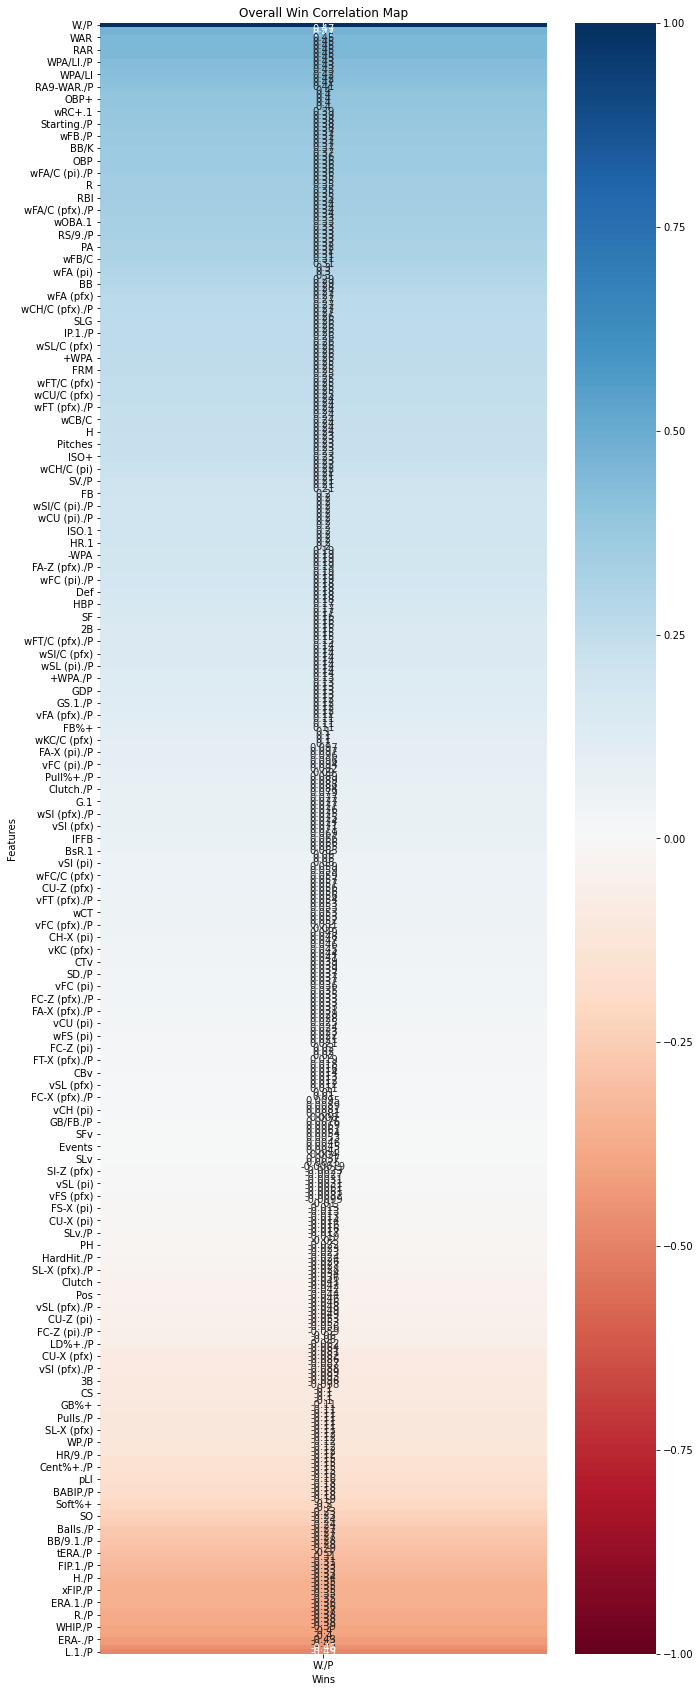

In [39]:
# large correlation heatmap to take a quick look at features that have a strong correlation with Ws
plt.figure(figsize = (10, 30))
sns.heatmap(df.corr()[['W./P']].sort_values('W./P', ascending=False),
           annot = True, cmap = 'RdBu', vmin = -1, vmax = 1)
plt.title('Overall Win Correlation Map');
plt.xlabel('Wins');
plt.ylabel('Features');

Blue (positively correlated) features and red (negatively correlated) features are much more likely to be used.

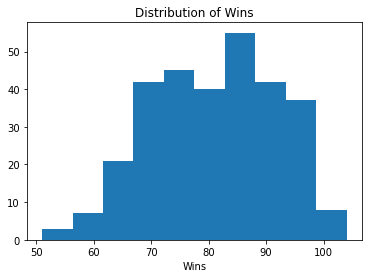

In [4]:
# Plotting distribution of wins
plt.hist(df['W./P'])
plt.xlabel('Wins')
plt.title('Distribution of Wins')
plt.show()

Distribution is normal which makes sense because all teams play the 162 games against each other.

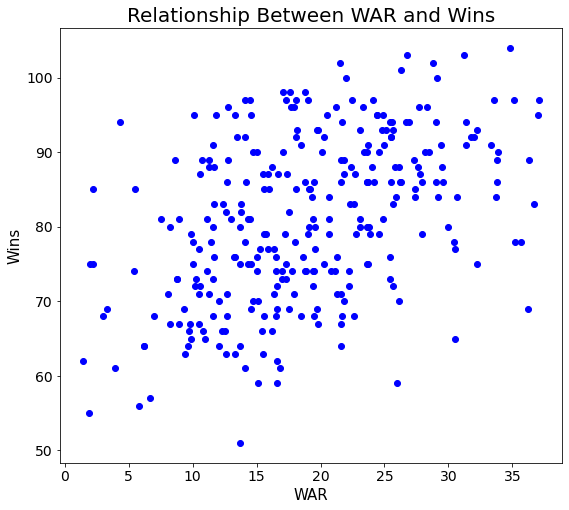

In [5]:
plt.figure(figsize = (9,8));
plt.scatter(df['WAR'],df['W./P'], color = 'blue');
plt.title('Relationship Between WAR and Wins', size = 20)
plt.xlabel('WAR', size = 15);
plt.ylabel('Wins', size = 15);
plt.xticks(size = 14);
plt.yticks(size = 14);

WAR measures a player's value in all facets of the game by deciphering how many more wins he's worth than a replacement-level player at his same position. A simple statistic but really correlated to wins.

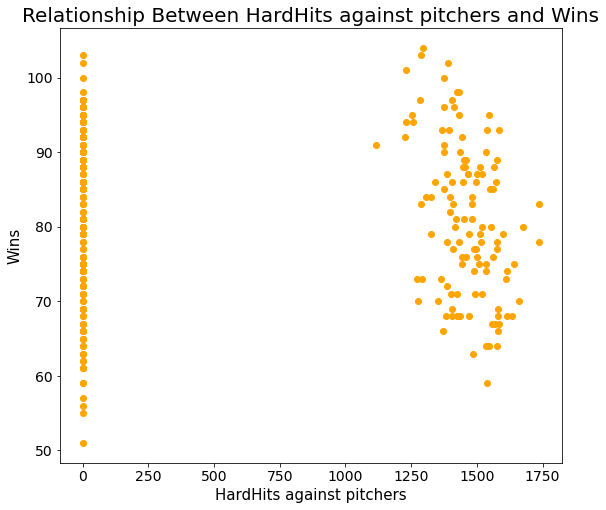

In [12]:
plt.figure(figsize = (9,8));
plt.scatter(df['HardHit./P'],df['W./P'], color = 'orange');
plt.title('Relationship Between HardHits against pitchers and Wins', size = 20)
plt.xlabel('HardHits against pitchers', size = 15);
plt.ylabel('Wins', size = 15);
plt.xticks(size = 14);
plt.yticks(size = 14);

Statcast defines a 'hard-hit ball' as one hit with an exit velocity of 95 mph or higher. Wait, why is there a line of years where teams hit 0 HardHits? Statcast is a high-speed, high-accuracy, automated tool developed to analyze player movements and athletic abilities in Major League Baseball. Statcast was introduced to all thirty MLB stadiums in 2015. That is why there are a bunch of zeroes there. Those zeroes are years 2009-2014. It still seems that having your pitcher give up a lot of hard hits isn't dirrectly correlated to wins. Probably won't use this as one of the features to predict wins.

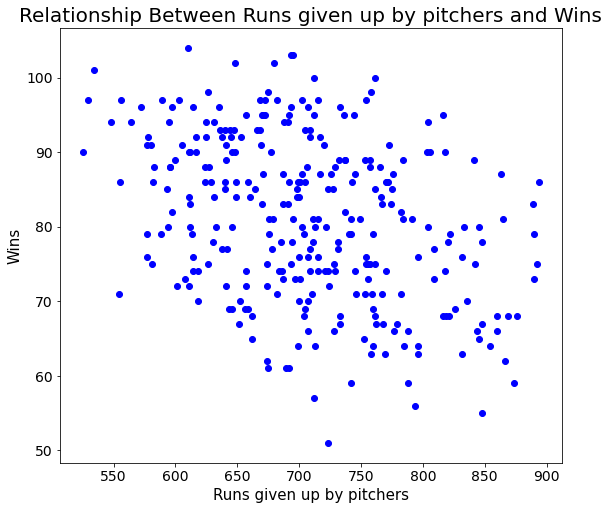

In [7]:
plt.figure(figsize = (9,8));
plt.scatter(df['R./P'],df['W./P'], color = 'blue');
plt.title('Relationship Between Runs given up by pitchers and Wins', size = 20)
plt.xlabel('Runs given up by pitchers', size = 15);
plt.ylabel('Wins', size = 15);
plt.xticks(size = 14);
plt.yticks(size = 14);

This makes perfect sense. Obviously the more runs your pitcher gives up, the more likely you are to lose. If you lose, you are clearly not winning! Runs against pitchers may be negatively correlated to wins but that doesn't mean we won't use it as a target. 

In [8]:
df = pd.read_csv('data/finaldata.csv') #Read in dataframe 
stats = df[['K/9./P','ERA./P','FIP./P','WAR./P','H./P','R./P','K/BB./P','AVG./P','WHIP./P','WPA./P','REW./P','WPA/LI./P','RBI','wOBA','wRC+','WAR','OPS','WPA','REW','WPA/LI','OBP+','W./P']]
#stats dataframe is the columns we will use to predict wins and also the wins column

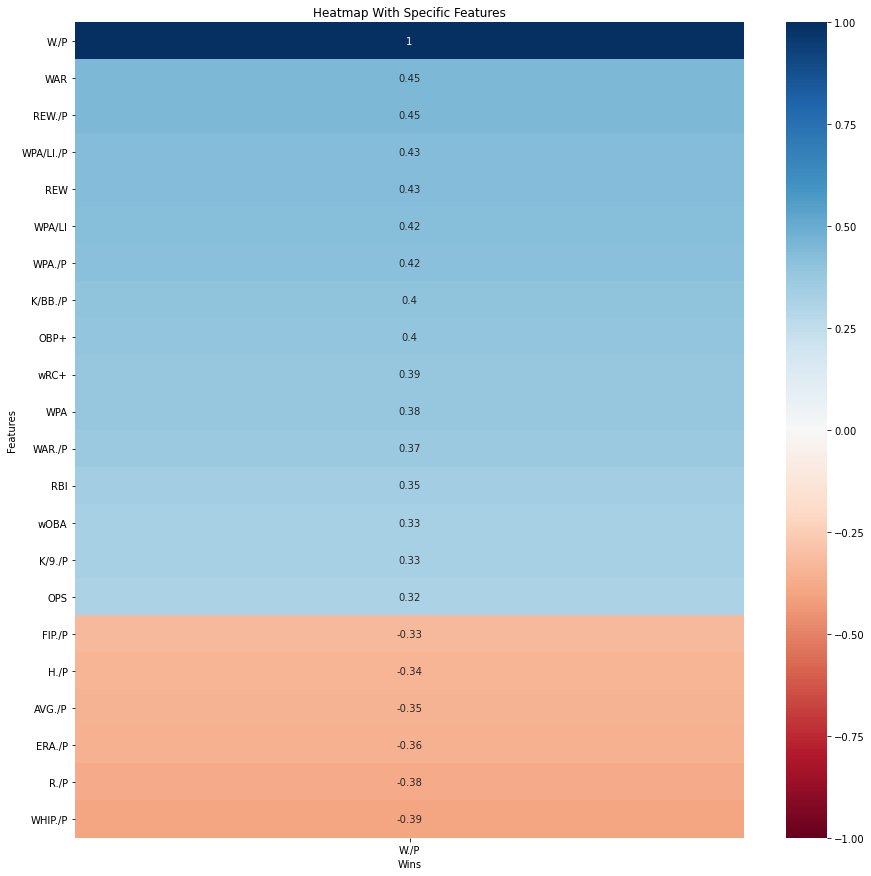

In [10]:
#correlation heatmap to take a quick look at features we end up choosing (will show  why in modeling notebook)
plt.figure(figsize = (15, 15))
sns.heatmap(stats.corr()[['W./P']].sort_values('W./P', ascending=False),
           annot = True, cmap = 'RdBu', vmin = -1, vmax = 1)
plt.title('Heatmap With Specific Features');
plt.xlabel('Wins');
plt.ylabel('Features');

They are all have a correlation above .3 with wins.

---

------------------------------------------------------------